In [64]:
import tensorflow as tf


# 딥 러닝을 이용한 자연어 처리 입문

아래 링크의 E-book을 보고 실습한 내용입니다.

WikiDocs 주소: https://wikidocs.net/31766

# 7장 머신 러닝 개요

## 4절 자동 미분과 선형 회귀 실습

## 식 $2w^2 + 5$을 $w$에 대하여 미분하는 예제

### Tensorflow 구현

In [65]:
w = tf.Variable(2.)


def f(w):
    y = w ** 2
    z = 2*y + 5
    return z


In [66]:
# GradientTape을 활용하여 w에 미분값이 저장되었음을 확인
with tf.GradientTape() as tape:
    z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)


[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [67]:
# 임의의 가중치와 편향 선언
W = tf.Variable(4.0)
b = tf.Variable(1.0)


In [68]:
# 가설 함수 선언
@tf.function
def hypothesis(x):
    return W*x + b


x_test = [1, 1.5, 3, 6, 10, 4.5]
print(f"가설 함수 출력 결과: {hypothesis(x_test).numpy()}")


가설 함수 출력 결과: [ 5.  7. 13. 25. 41. 19.]


In [69]:
# MSE 함수
@tf.function
def mse_loss(y_pred, y):
    # (예측값 - 실제값)^2 의 평균
    return tf.reduce_mean(tf.square(y_pred - y))


X = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95]  # 각 공부하는 시간에 맵핑되는 성적

# 최적화 알고리즘: 경사 하강법, 학습률 0.01
optimizer = tf.optimizers.SGD(0.01)


In [70]:
for i in range(301):
    with tf.GradientTape() as tape:
        y_pred = hypothesis(X)
        cost = mse_loss(y_pred, y)
    gradients = tape.gradient(cost, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

    if i % 10 == 0:
        print(
            f"epoch: {i:3} | W: {W.numpy():5.4f} | b: {b.numpy():5.4} | cost: {cost:5.6f}")


epoch:   0 | W: 8.2133 | b: 1.664 | cost: 1402.555542
epoch:  10 | W: 10.4971 | b: 1.977 | cost: 1.351182
epoch:  20 | W: 10.5047 | b:  1.93 | cost: 1.328165
epoch:  30 | W: 10.5119 | b: 1.884 | cost: 1.306967
epoch:  40 | W: 10.5188 | b: 1.841 | cost: 1.287436
epoch:  50 | W: 10.5254 | b: 1.799 | cost: 1.269459
epoch:  60 | W: 10.5318 | b: 1.759 | cost: 1.252898
epoch:  70 | W: 10.5379 | b: 1.721 | cost: 1.237644
epoch:  80 | W: 10.5438 | b: 1.684 | cost: 1.223598
epoch:  90 | W: 10.5494 | b: 1.648 | cost: 1.210658
epoch: 100 | W: 10.5548 | b: 1.614 | cost: 1.198740
epoch: 110 | W: 10.5600 | b: 1.582 | cost: 1.187767
epoch: 120 | W: 10.5650 | b:  1.55 | cost: 1.177665
epoch: 130 | W: 10.5697 | b:  1.52 | cost: 1.168354
epoch: 140 | W: 10.5743 | b: 1.492 | cost: 1.159782
epoch: 150 | W: 10.5787 | b: 1.464 | cost: 1.151890
epoch: 160 | W: 10.5829 | b: 1.437 | cost: 1.144619
epoch: 170 | W: 10.5870 | b: 1.412 | cost: 1.137924
epoch: 180 | W: 10.5909 | b: 1.387 | cost: 1.131752
epoch: 190

In [71]:
# 임의의 값을 넣어 출력되는 결과 확인
x_test = [3.5, 5, 5.5, 6]
print("임의의 입력에 대한 출력:", hypothesis(x_test).numpy())


임의의 입력에 대한 출력: [38.35479  54.295143 59.608593 64.92204 ]


### Keras 구현

In [72]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [76]:
X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 입력 x의 차원은 1, 출력 y의 차원도 1. 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# 최적화 알고리즘: Stochastic gradient descent, 학습률 0.01
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(X, y, epochs=300)

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 4342.5947 - mse: 4342.5947
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 535.4396 - mse: 535.4396
Epoch 3/500
1/1 [==============================] - 0s 999us/step - loss: 66.9962 - mse: 66.9962
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 9.3563 - mse: 9.3563
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 2.2626 - mse: 2.2626
Epoch 6/500
1/1 [==============================] - 0s 1ms/step - loss: 1.3883 - mse: 1.3883
Epoch 7/500
1/1 [==============================] - 0s 1000us/step - loss: 1.2792 - mse: 1.2792
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 1.2643 - mse: 1.2643
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 1.2610 - mse: 1.2610
Epoch 10/500
1/1 [==============================] - 0s 1ms/step - loss: 1.2592 - mse: 1.2592
Epoch 11/500
1/1 [==============================] - 0s 1ms/ste

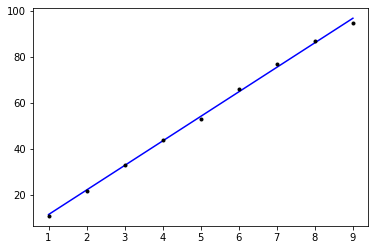

In [77]:
# 학습된 모델이 그리는 최적화된 직선
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X, y, 'k.')

In [82]:
# 학습 데이터에 없던 데이터 예측
print("예측값:", model.predict([9.5]))

예측값: [[102.2315]]
